
<center>

---
# **Agrupamiento jerarquico**
---

</center>

El agrupamiento jerarquico es un metodo descriptivo, cuyo objetivo es crear grupos de individuos buscando que se cumplan las siguientes condiciones:
1. Son grupos muy homogeneos dentro de si.
2. Son muy heteregeneos dentro de ellos.

En el metodo jerarquico se realiza mediante los siguientes pasos:
1.  Se calcula la matriz de distancia entre individuos
2. Se agrupan los individuos que tengan la menor distancia entre ellos.
3. Se repite el paso 1 y 2 hasta lograr tener a todos los individuos en 1 grupo.

Para lograr este algoritmo se necesitan dos medidas importantes:
1. Una medida de distancia entre individuos
2. Una medida de distancia entre grupos de individuos

# Distancias usadas entre individuos
Sea $x=(x_1, \ldots, x_p)$ y $y=(y_1, \ldots, y_p)$ dos individuos con sus vectores de variables observadas (todas cuantitativas) se definen las siguientes distancias:
1. Distancia [Euclidiana](https://es.wikipedia.org/wiki/Distancia_euclidiana):
$$D(x,y)=\sqrt{\sum_{i=1}^p (x_i-y_i)^2}=\sqrt{(x-y)^T(x-y)}$$
2. Distancia de [Mahalanobis](https://es.wikipedia.org/wiki/Distancia_de_Mahalanobis)
 $$D(x,y)=\sqrt{(x-y)^T\Sigma^{-1}(x-y)}$$
3. Distancia de [Manhattan](https://es.wikipedia.org/wiki/Geometr%C3%ADa_del_taxista)  
$$D(x,y)=\sum_{i=1}^p |x_i-y_i|$$

4. Distancia de [Minkowski](https://es.qwe.wiki/wiki/Minkowski_distance)
$$D(x,y)=\left(\sum_{i=1}^p |x_i-y_i|^p\right)^{\frac{1}{p}}$$

# Medida de similaridad
Sea $r$ y $s$ dos conjuntos (cluster) de $k$ y $l$ individuos, entonces las siguientes medidas de similaridad se definen entre los grupos (cluster):

1. Enlace simple:
$$D_{rs}=min\{D(X_r, Y_s)\}$$
2. Enlace completo:
$$D_{rs}=max\{D(X_r, Y_s)\}$$
3. Enlace promedio:
$$D_{rs}=\frac{1}{lk}\sum_{rs}D(X_r, Y_s)$$
4. Enlace centroide:
$$D_{rs}=D(\bar{X}_r, \bar{Y}_s)$$
5. Metodo de Ward:
$$D_{rs}=\sqrt{\frac{2kl}{k+l}}\cdot||\bar{X}_r- \bar{Y}_s||$$

In [56]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv("https://github.com/Wilsonsr/Metodos-Estadisticos/raw/main/BASES/Mall_Customers%20(1).csv")


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
dataset

El conjunto de datos contiene información sobre las personas que visitan el centro comercial. El conjunto de datos tiene sexo, identificación del cliente, edad, ingresos anuales y puntuación de gastos.


In [57]:
#!pip install sweetviz
import sweetviz as sv

In [58]:
reporte=sv.analyze(dataset)
from IPython.display import HTML


                                             |          | [  0%]   00:00 -> (? left)

In [59]:
reporte.show_html()
#HTML("SWEETVIZ_REPORT.html")

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [61]:
#!pip install pygwalker
import pygwalker as pyg
pyg.walk(dataset)

Box(children=(HTML(value='<div id="ifr-pyg-000613bb56a36e9a2yjrdG4AfXlTE5hS" style="height: auto">\n    <head>…

In [62]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

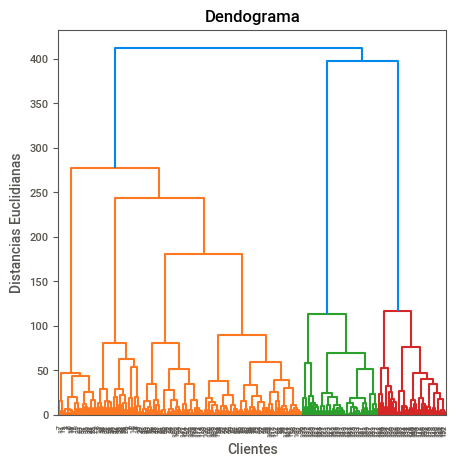

In [71]:
# Creamos el dendograma para encontrar el número óptimo de clusters

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(5,5) )
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [72]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters =3,
                    metric= 'euclidean',
                    linkage = 'ward',                        
                    )

y_hc = hc.fit_predict(X)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

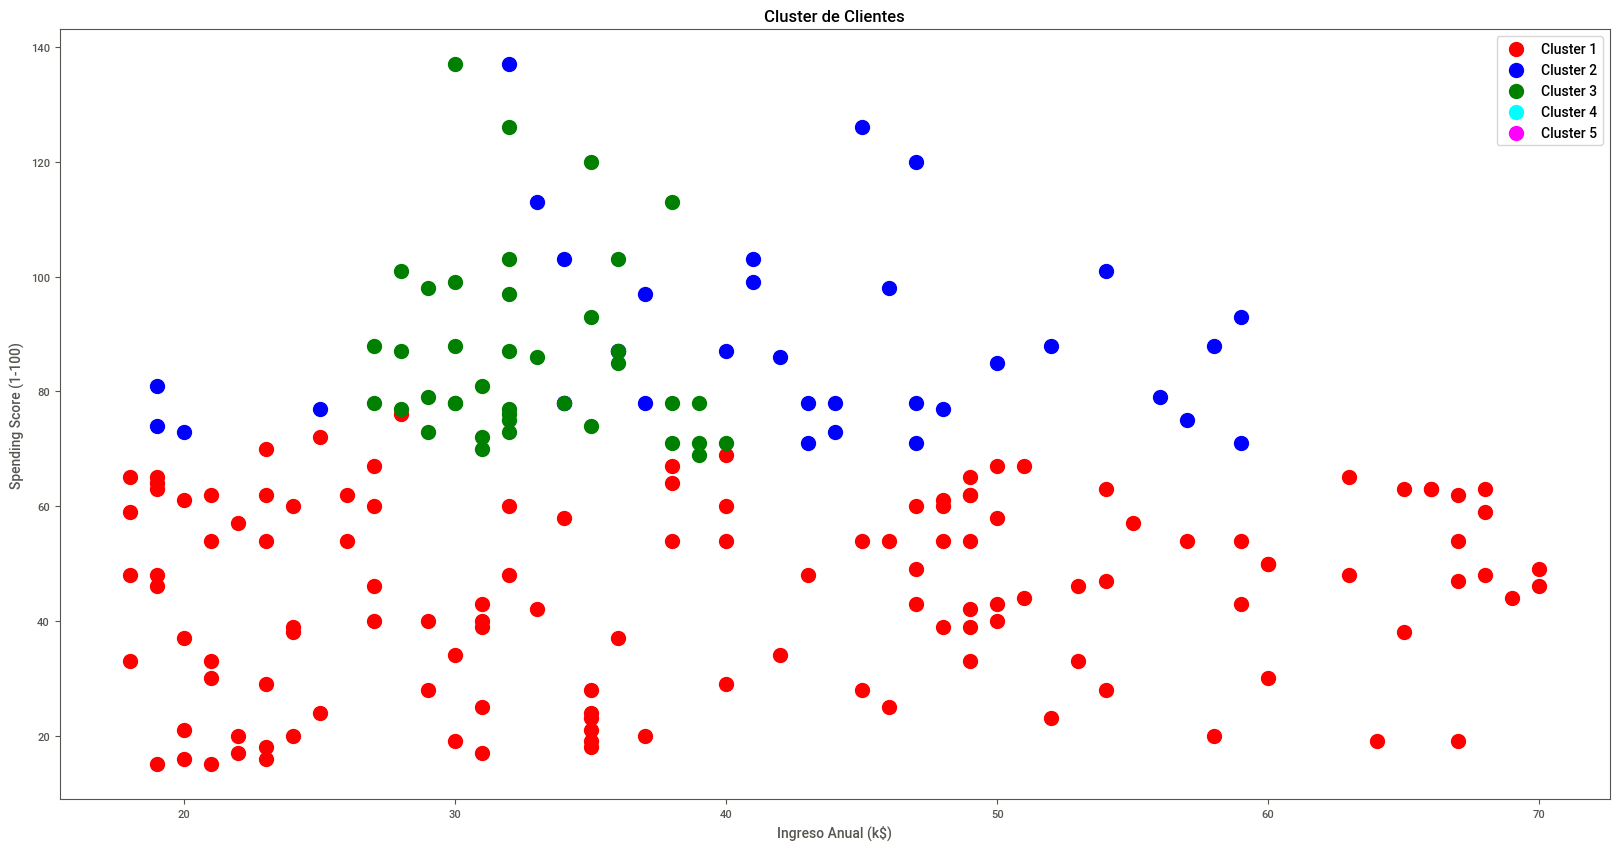

In [73]:
#Vizualizar los cluster
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Cluster de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [75]:
import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt

In [76]:
url="https://github.com/Wilsonsr/Metodos-Estadisticos/raw/main/BASES/Cancer.csv"
datos=pd.read_csv(url, sep=";", index_col=0)
datos

,Tipo,Radio,Textura,Perimetro,Area,Suavidad,Compacidad,Concavidad,Puntos_Conca,Simetria,...,Radio_WM,Textura_WM,Perimetro_WM,Area_WM,Suavidad_WM,Compacidad_WM,Concavidad_WM,Puntos_Conca_WM,Simetria_WM,Fractal_WM
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,1799,1038,1228,1001,1184,2776,3001,1471,2419,...,2538,1733,1846,2019,1622,6656,7119,2654,4601,1189
842517,M,2057,1777,1329,1326,8474,7864,869,7017,1812,...,2499,2341,1588,1956,1238,1866,2416,186,275,8902
84300903,M,1969,2125,130,1203,1096,1599,1974,1279,2069,...,2357,2553,1525,1709,1444,4245,4504,243,3613,8758
84348301,M,1142,2038,7758,3861,1425,2839,2414,1052,2597,...,1491,265,9887,5677,2098,8663,6869,2575,6638,173
84358402,M,2029,1434,1351,1297,1003,1328,198,1043,1809,...,2254,1667,1522,1575,1374,205,4,1625,2364,7678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,2156,2239,142,1479,111,1159,2439,1389,1726,...,2545,264,1661,2027,141,2113,4107,2216,206,7115
926682,M,2013,2825,1312,1261,978,1034,144,9791,1752,...,2369,3825,155,1731,1166,1922,3215,1628,2572,6637
926954,M,166,2808,1083,8581,8455,1023,9251,5302,159,...,1898,3412,1267,1124,1139,3094,3403,1418,2218,782


In [77]:
datos.columns

Index(['Tipo', 'Radio', 'Textura', 'Perimetro', 'Area', 'Suavidad',
       'Compacidad', 'Concavidad', 'Puntos_Conca', 'Simetria', 'Fractal',
       'Radio_SE', 'Textura_SE', 'Perimetro_SE', 'Area_SE', 'Suavidad_SE',
       'Compacidad_SE', 'Concavidad_SE', 'Puntos_Conca_SE', 'Simetria_SE',
       'Fractal_SE', 'Radio_WM', 'Textura_WM', 'Perimetro_WM', 'Area_WM',
       'Suavidad_WM', 'Compacidad_WM', 'Concavidad_WM', 'Puntos_Conca_WM',
       'Simetria_WM', 'Fractal_WM'],
      dtype='object')

## Libreria SciPy

1. La documentación de distancias [acá](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist)

2. La documentación de enlaces [acá](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

In [78]:
from scipy.cluster.hierarchy import dendrogram ### pintar dendrograma
from sklearn.cluster import AgglomerativeClustering ## Calcular Agrupamiento jerarquico
import scipy.cluster.hierarchy as sch ## DIstancias

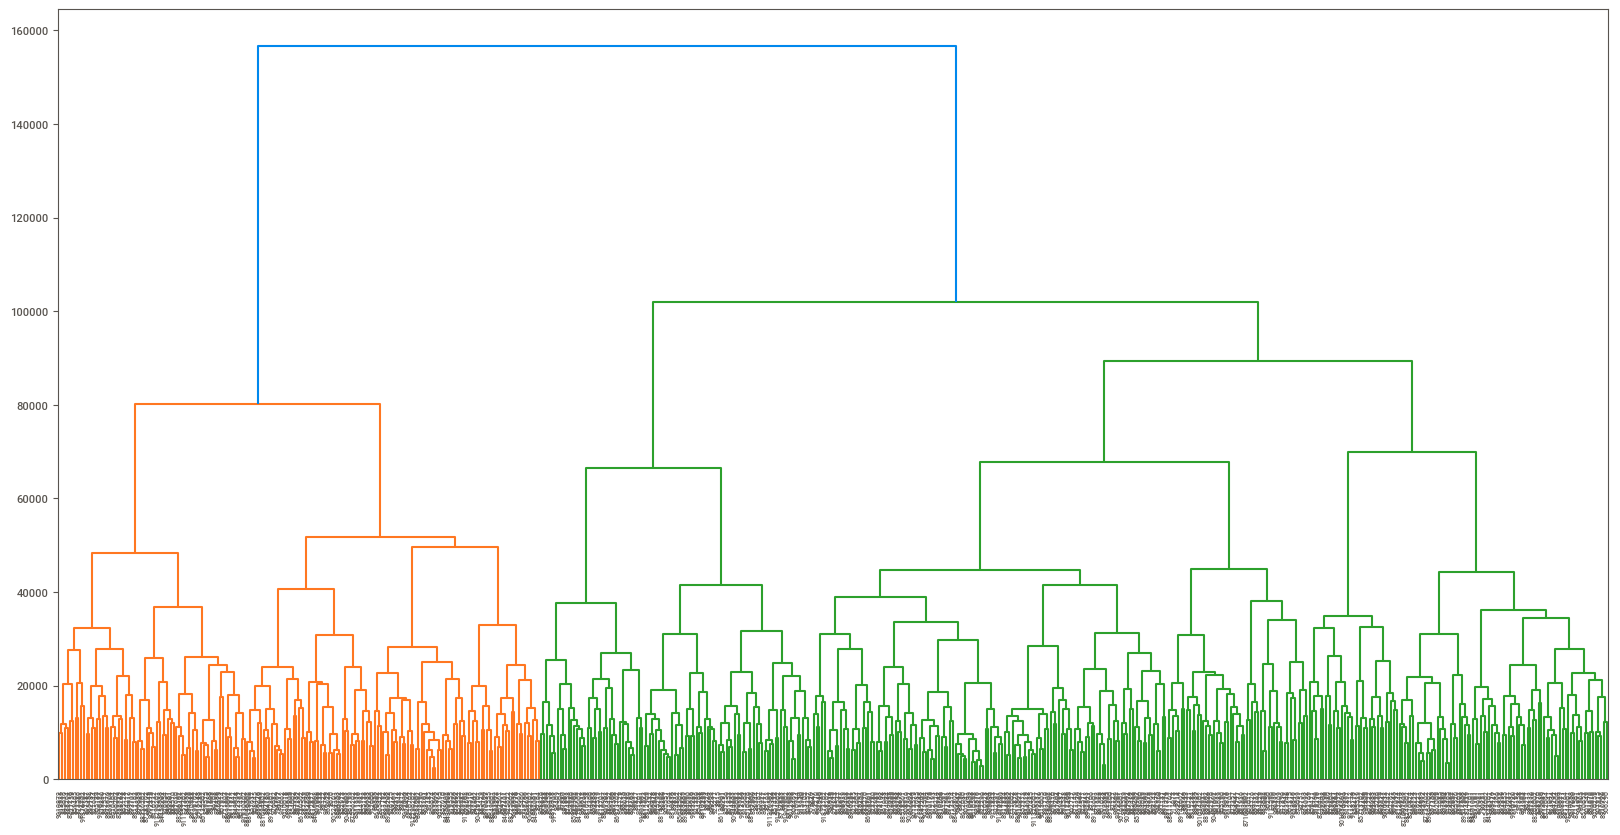

In [79]:
base=datos.select_dtypes(np.number)
plt.rcParams["figure.figsize"] = (20,10)
dendogram=sch.dendrogram(sch.linkage(base, method='ward',metric="euclidean"),labels=datos.index)
### Mahalanobis es equivalente a Pearson en R

## Estandarizar los datos

Todas las variables tengan las misma importancia

In [80]:
from sklearn.preprocessing import StandardScaler
datosescalados=StandardScaler(with_mean=True, with_std=True).fit(base)
datosnuevos=datosescalados.transform(base)
datosnuevos

array([[-0.042342  , -1.12758791, -1.26455761, ..., -0.29721641,
         1.93939039, -1.7036228 ],
       [ 0.07737623,  0.0048341 , -1.23488177, ..., -1.14150568,
        -2.21260103,  0.89162179],
       [ 0.0365421 ,  0.53809914, -1.5871723 , ..., -1.12200629,
         0.9911316 ,  0.84316915],
       ...,
       [-0.80009339,  1.5847084 , -1.30716156, ..., -0.72004523,
        -0.34775606, -1.84056881],
       [-0.78153242,  1.77625475, -1.2137267 , ..., -1.11448022,
         1.44606547, -2.06197046],
       [-0.51703867,  1.04224913, -0.21738209, ..., -1.20513526,
         0.27897773,  0.26476575]])

In [81]:
type(datosnuevos)

numpy.ndarray

In [82]:
datosnuevos.shape

(569, 30)

In [94]:
datosnuevos[:,3].std()

1.0

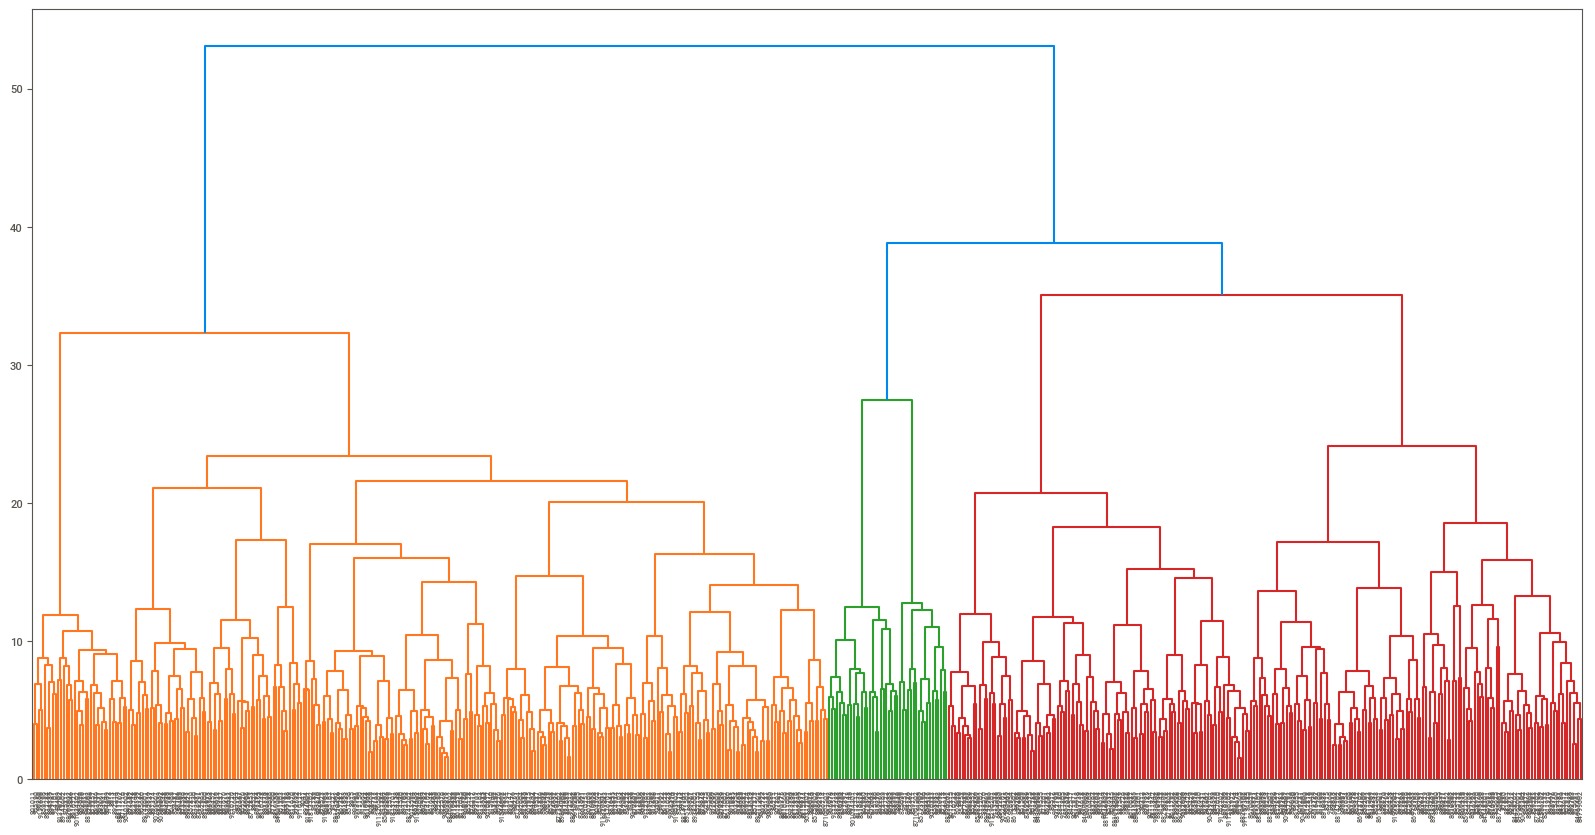

In [83]:
plt.rcParams["figure.figsize"] = (20,10)
dendogram=sch.dendrogram(sch.linkage(datosnuevos, method='ward',metric="euclidean"),labels=datos.index)

## **Coeficiente aglomerativo**

Sea $l_i$ la distancia entre el valor maximo y el valor donde se une un dato al arbol, se define el coeficiente aglomerativo como
$$AC_{arbol}=\frac{1}{dmaxima}\sum_{i=1}^n l_i$$
Se espera que sea cercano a 1 y se elige el arbol con el coeficiente más alto.

In [101]:
base=pd.DataFrame(datosnuevos) ## los datos estandarizados
enlace=sch.linkage(base, method='complete',metric="cityblock")
enlaces=pd.DataFrame(enlace) ## El objeto  sch.linkage
a=enlaces[enlaces[0].isin(base.index)]
b=enlaces[enlaces[1].isin(base.index) ]
sum(max(enlaces[2])-pd.concat([a,b], axis=0)[2])/(max(enlaces[2])*base.shape[0])

0.7455115584812303

In [102]:
def agnes_coef(bas,metodo,metrica):
    '''
    Función que permite determinar el coeficiente de aglomeración entre varias métricas y métodos
    Datos de entrada:
        Obligatorios:
            base: se recomienda la base ya normalizada y que solo contenga variables cuantitativas.
            método: contiene la lista de métodos que se usara a comparar.
            métrica: contiene la lista de las métricas que se usara para comparar
    Datos de salida:
        devolverá un Dataframe que contendrá el cálculo de cada coeficiente de aglomeración, donde los métodos son
        las columnas y las métricas los índices. Dado el caso que el resultado sea -1 es que la combinación entre
        métrica y método genera error.
    '''
    bas=pd.DataFrame(bas)
    bas_resul=pd.DataFrame(columns=metrica,index=metodo)
    for i in range(len(metodo)):
        for j in range(len(metrica)):
            try:
                enla=sch.linkage(bas, method=metodo[i], metric=metrica[j])
                enlas=pd.DataFrame(enla)
                a1=enlas[enlas[0].isin(bas.index)]
                b1=enlas[enlas[1].isin(bas.index)]
                resul=sum(max(enlas[2])-pd.concat([a1,b1],axis=0)[2])/(max(enlas[2])*bas.shape[0])
                bas_resul.iloc[i,j]=resul
            except ValueError:
                bas_resul.iloc[i,j]=-1

    return bas_resul

In [103]:
agnes_coef(base,["ward","complete","single", "average","centroid", "median"],
           ["braycurtis", "canberra", "chebyshev",
          "cityblock", "correlation", "cosine", "euclidean", "jensenshannon", "mahalanobis"])

,braycurtis,canberra,chebyshev,cityblock,correlation,cosine,euclidean,jensenshannon,mahalanobis
ward,-1,-1,-1,-1,-1,-1,0.917925,-1,-1
complete,0.869678,0.626491,0.759495,0.745512,0.818476,0.814035,0.701819,-1,0.656833
single,0.413863,0.367456,0.476254,0.481109,0.46757,0.460596,0.496512,-1,0.468966
average,0.677432,0.482413,0.619616,0.633002,0.714911,0.707981,0.582845,-1,0.560422
centroid,-1,-1,-1,-1,-1,-1,0.557721,-1,-1
median,-1,-1,-1,-1,-1,-1,0.49461,-1,-1


In [104]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,
                    metric = 'euclidean',
                    linkage = 'ward')

y_hc = hc.fit_predict(datosnuevos)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0,
       2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1,
       2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b01f3fd-002a-43ad-8b2f-83f22b9a4ee6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>